In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Zad
Wygenerujmy punkty w kształcie prostej.

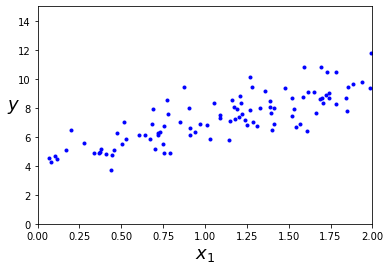

In [23]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [26]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.38006544],
       [2.6634436 ]])

Wyraz wolny jest równy: [4.38]
Współczynnik kierunkowy wynosi: [[2.663]]
Współczynnik dopasowania wynosi: 0.653


[]

<Figure size 144x144 with 0 Axes>

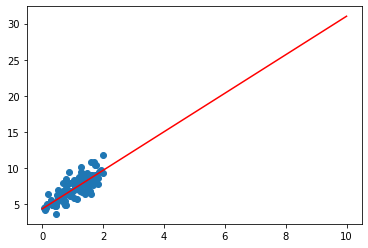

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as slm

regresja = slm.LinearRegression()



regresja.fit(X, y)


print('Wyraz wolny jest równy: %s' % np.round(regresja.intercept_,3))
print('Współczynnik kierunkowy wynosi: %s' % np.round(regresja.coef_,3))
print('Współczynnik dopasowania wynosi: %s' % np.round(regresja.score(X,y),3))
plt.figure(figsize=(2,2)) 
w0, [w1] = regresja.intercept_, regresja.coef_
fig, ax = plt.subplots()
ax.scatter(X, y)
yreg = w0 + w1*x
x = np.array([0, 10])
ax.plot(x, yreg, color='red')

plt.plot()

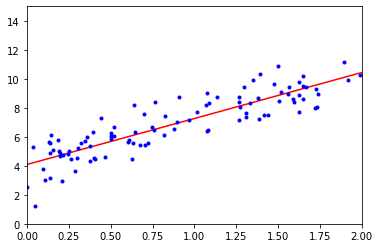

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Prównaj z wynikiem funkcji:
```python
LinearRegression()
```

# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{\small \mbox{Nex step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

In [43]:
def gradient_descent(gradient, start, learn_rate, n_iter):

    vector = start

    for _ in range(n_iter):

        diff = -learn_rate * gradient(vector)

        vector += diff

    return vector

In [47]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta_path_bgd = []

theta_0 = np.random.randn(2,1)  # random initialization

theta = theta_0
print(theta)
print(theta_path_bgd)


[[-0.77404921]
 [ 0.03304555]]
[]


In [50]:
for i in theta:
    res = gradient_descent(gradient=lambda x: w0 + w1*x, start= i, learn_rate=eta,n_iter=n_iterations)
    for j in res:
        print(j)

-1.644512176459012
-1.644512176459012


# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [10]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [3]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = theta_0


In [51]:
def sgd(

    gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50,

    tolerance=1e-06, dtype="float64", random_state=None

):

    # Checking if the gradient is callable

    if not callable(gradient):

        raise TypeError("'gradient' must be callable")


    # Setting up the data type for NumPy arrays

    dtype_ = np.dtype(dtype)


    # Converting x and y to NumPy arrays

    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)

    n_obs = x.shape[0]

    if n_obs != y.shape[0]:

        raise ValueError("'x' and 'y' lengths do not match")

    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]


    # Initializing the random number generator

    seed = None if random_state is None else int(random_state)

    rng = np.random.default_rng(seed=seed)


    # Initializing the values of the variables

    vector = np.array(start, dtype=dtype_)


    # Setting up and checking the learning rate

    learn_rate = np.array(learn_rate, dtype=dtype_)

    if np.any(learn_rate <= 0):

        raise ValueError("'learn_rate' must be greater than zero")


    # Setting up and checking the size of minibatches

    batch_size = int(batch_size)

    if not 0 < batch_size <= n_obs:

        raise ValueError(

            "'batch_size' must be greater than zero and less than "

            "or equal to the number of observations"

        )


    # Setting up and checking the maximal number of iterations

    n_iter = int(n_iter)

    if n_iter <= 0:

        raise ValueError("'n_iter' must be greater than zero")


    # Setting up and checking the tolerance

    tolerance = np.array(tolerance, dtype=dtype_)

    if np.any(tolerance <= 0):

        raise ValueError("'tolerance' must be greater than zero")


    # Performing the gradient descent loop

    for _ in range(n_iter):

        # Shuffle x and y

        rng.shuffle(xy)


        # Performing minibatch moves

        for start in range(0, n_obs, batch_size):

            stop = start + batch_size

            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]


            # Recalculating the difference

            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)

            diff = -learn_rate * grad


            # Checking if the absolute difference is small enough

            if np.all(np.abs(diff) <= tolerance):

                break


            # Updating the values of the variables

            vector += diff


    return vector if vector.shape else vector.item()

In [55]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()  # .mean() is a method of np.ndarray


sgd(ssr_gradient, X, y, start=[0.5, 0.5], learn_rate=0.0008,batch_size=3, n_iter=100_000, random_state=0)

array([4.38066395, 2.66205935])

[[4.56308925]
 [3.08139533]]


# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

In [4]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = theta_0

In [5]:
print(theta)

# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [16]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

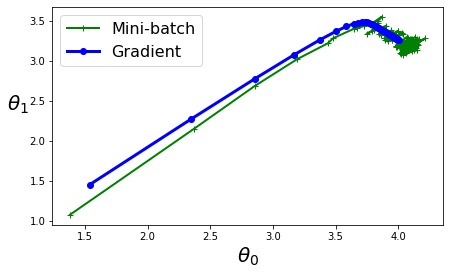